In [ ]:
# Paper Title: Measuring a Text’s Fairness Dimensions Using Machine Learning Based on Social Psychological Factors   
# 

# Install the following when running for first time 

import sys
!{sys.executable} -m pip install seaborn 
!{sys.executable} -m pip install spacy
!{sys.executable} -m pip install pyinflect
!{sys.executable} -m pip install lemminflect
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install transformers
!{sys.executable} -m pip install tensorflow #(or install using anaconda if denied access: https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/ )
!{sys.executable} -m pip install -U pytorch-pretrained-bert
!pip install https://github.com/MartinoMensio/spacy-universal-sentence-encoder/releases/download/v0.4.3/en_use_md-0.4.3.tar.gz 
!pip install fitbert
!pip install wonderwords
!pip install pattern
!pip install spacy-universal-sentence-encoder
!{sys.executable} -m pip install plotly==5.3.1
!pip install spacy

In [ ]:
import lemminflect 
import gzip
import transformers
transformers.__version__
from transformers import pipeline
import pyinflect
import wonderwords
import spacy
import matplotlib.pyplot as plt
from spacy import displacy
import scipy.stats as stats
import numpy as np
import os
import pandas as pd
from pylab import rcParams
import docx
import re
import seaborn as sns
import nltk 
from nltk.corpus import wordnet 
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
import plotly.express as px
import re
import sympy
import torch
torch.cuda.is_available()  #(if not available: it may be that there is no GPU in the computer)
import seaborn as sns
from fitbert import FitBert
fb = FitBert()
import random
from wonderwords import RandomWord
from wonderwords import RandomSentence
s = RandomSentence()
r = RandomWord()
unmasker = pipeline('fill-mask', model='albert-xxlarge-v2')
#Load the Universal Sentence Encoder's TF Hub module
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)
#nlp = spacy.load('en_core_web_lg')#  "conda install -c conda-forge spacy" @ anaconda prompt,  python -m spacy download en
#The NLP parser 
#from spacy import en_core_web_lg
#nlp = en_core_web_lg.load()
nlp = spacy.load('en_core_web_sm')



In [70]:
#import the data that will be tested with the code e.g. test sentences 

from fair_unfair import fair_unfair
from thirty_six_fair_unfair import thirty_six_fair_unfair 


pd.options.display.max_rows = 400

In [71]:
#Build Sentence FairVec (S-FairVec) using 10 abstract concepts to represent the social ontology of fairness 
 
res = "is was responsible"
resA = [res]
resV = embed(resA)

irres = "is was irresponsible"
irresA = [irres]
irresV = embed(irresA)

joy = "it was joyous"
joyA = [joy]
joyV = embed(joyA)

pain = "it was sad"
painA = [pain]
painV = embed(painA)

ben = "it was beneficial to society"
benA = [ben]
benV = embed(benA)

har = "it was not beneficial to society"
harA = [har]
harV = embed(harA)

#lib = "liberty"
lib = "was free to and rewarded"
libA = [lib]
libV = embed(libA)

pri = "was sent to prison and punished"
priA = [pri]
priV = embed(priA)

app = "it was beneficial"
appA = [app]
appV = embed(appA)

inapp = "it was harmful"
inappA = [inapp]
inappV = embed(inappA)


ResponsibilityV = resV - irresV 
EmotionV = joyV - painV 
ConsequenceV = libV - priV   
BeneficialV = benV - harV 
HarmV = appV - inappV  

#This is S-FairVec which combines the above vectors into one (it needs error minimisation)
SFairVec = resV - irresV + joyV - painV  + libV - priV   + benV - harV  + appV - inappV #+ desV - notDesV

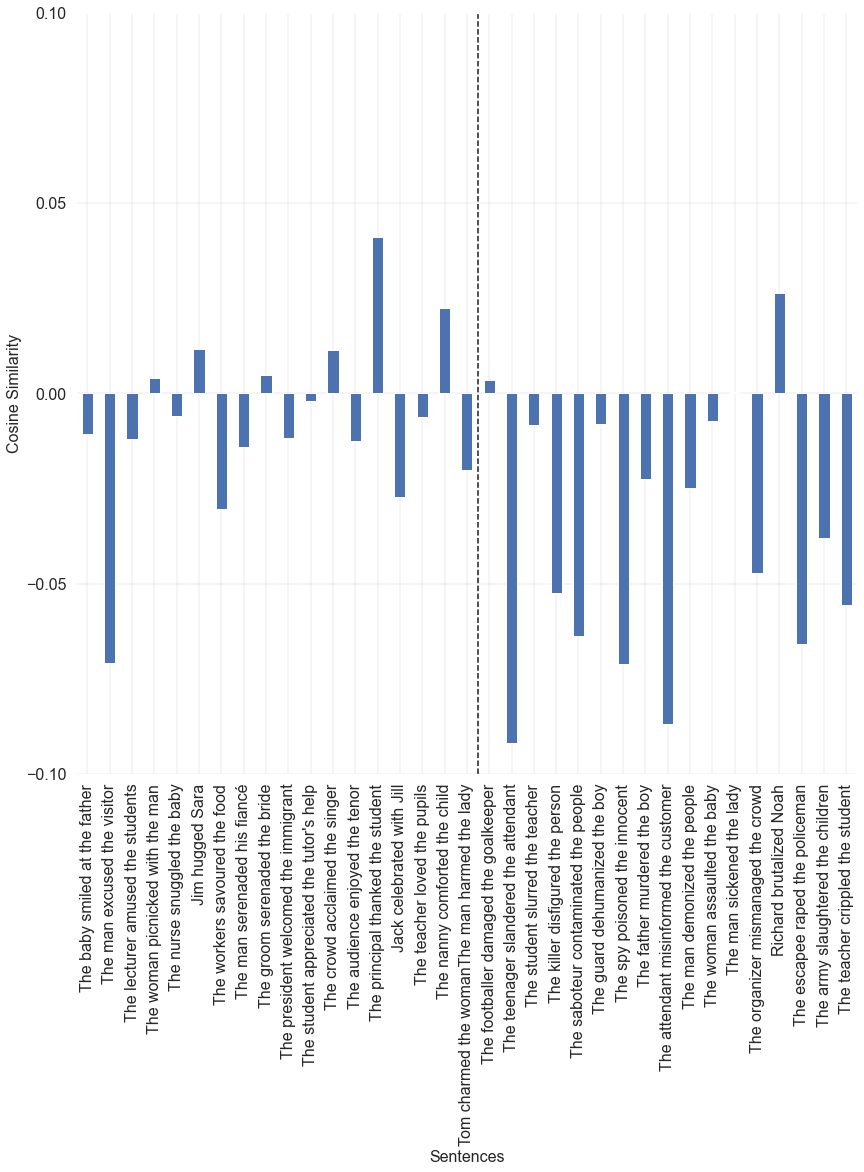

In [72]:
#Function to compare FairVec agaist a list of the randomly selected 36 sentences

fair_s = "it was fair"
fair_sA = [fair_s]
fair_sV = embed(fair_sA)

unfair_s = "it was unfair"
unfair_sA = [unfair_s]
unfair_sV = embed(unfair_sA)

word_fair_unfair= fair_sV-unfair_sV

def run_word_fairVec(sentences_to_test):
    word_FairVecResults=[]
    lenght = len(sentences_to_test)
    sentence_embeddings = embed(sentences_to_test)
   # sentence_embeddings= sentence_embeddings-inappV
    for i in range(lenght):
        dot =  np.inner(word_fair_unfair,sentence_embeddings[i])
        word_FairVecResults.append(
            {
                'Score': dot,
                'Sentence':sentences_to_test[i],
            }

        )

    word_df_fairness=pd.DataFrame(word_FairVecResults)
    word_df_fairness['Score'] = word_df_fairness['Score'].astype(float)
    #df_wantedness_even_if_punative['Score2'] = df_wantedness_even_if_punative['Score2'].astype(float)
    word_df_fairness['Sentence'] = word_df_fairness['Sentence'].astype(str)
    return word_df_fairness#.sort_values(by='Score', ascending=False)



#Carry out word_FairVec
word_fair_results=run_word_fairVec(thirty_six_fair_unfair)


ax_word_fair = word_fair_results.plot.bar(x='Sentence', y='Score', legend=False, figsize=(14,14))
ax_word_fair.tick_params(labelbottom=True,labeltop=False)
plt.xticks(rotation = 90)
ax_word_fair.axvline(17.5, color='k', linestyle='--')
ax_word_fair.set_facecolor("white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=16)
plt.xlabel('Sentences', fontsize=16)
plt.ylim(-0.1, 0.1)
plt.grid(True, which='both')



plt.show()



(array([-0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

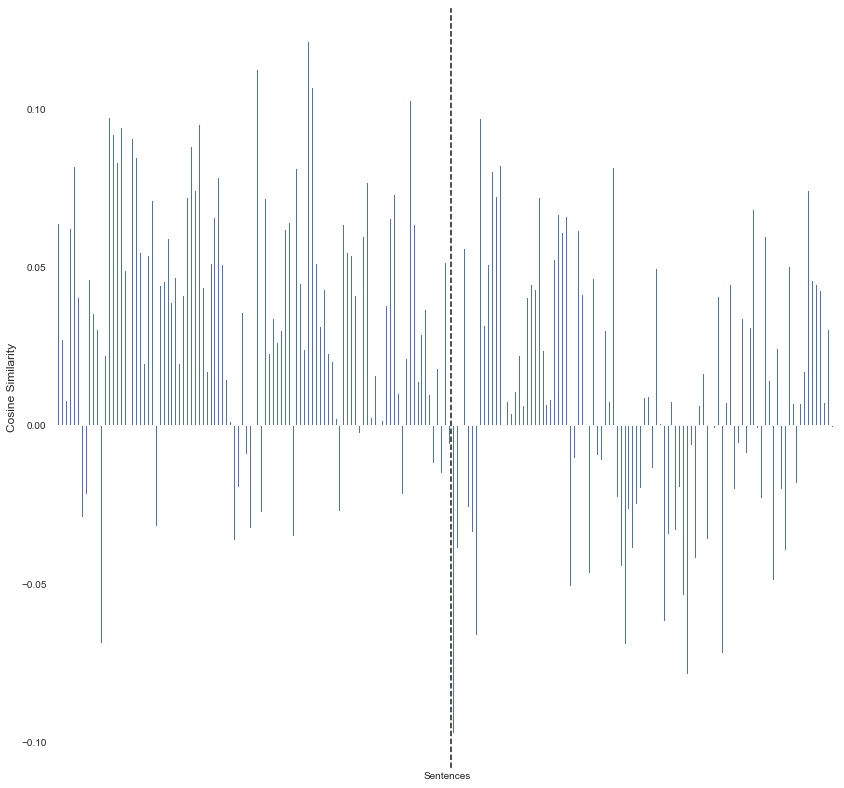

In [73]:
#Function to compare FairVec agaist the full list 200 of sentences

fair_s = "it was fair"
fair_sA = [fair_s]
fair_sV = embed(fair_sA)

unfair_s = "it was not fair"
unfair_sA = [unfair_s]
unfair_sV = embed(unfair_sA)

word_fair_unfair= fair_sV-unfair_sV

def run_word_fairVec(sentences_to_test):
    word_FairVecResults=[]
    lenght = len(sentences_to_test)
    sentence_embeddings = embed(sentences_to_test)
   # sentence_embeddings= sentence_embeddings-inappV
    for i in range(lenght):
        dot =  np.inner(word_fair_unfair,sentence_embeddings[i])
        word_FairVecResults.append(
            {
                'Score': dot,
                'Sentence':sentences_to_test[i],
            }

        )

    word_df_fairness=pd.DataFrame(word_FairVecResults)
    word_df_fairness['Score'] = word_df_fairness['Score'].astype(float)
    #df_wantedness_even_if_punative['Score2'] = df_wantedness_even_if_punative['Score2'].astype(float)
    word_df_fairness['Sentence'] = word_df_fairness['Sentence'].astype(str)
    return word_df_fairness#.sort_values(by='Score', ascending=False)

#Carry out word_FairVec
word_fair_results=run_word_fairVec(fair_unfair)
ax_word_fair = word_fair_results.plot.bar(x='Sentence', y='Score', rot=90,figsize=(14,14), fontsize=(4), legend=False )
ax_word_fair.axvline(100.5, color='k', linestyle='--')
plt.ylabel('Cosine Similarity', fontsize=12)
plt.xlabel('Sentences', fontsize=10)
plt.xticks([])
ax_word_fair.set_facecolor("white")
plt.yticks(fontsize=10)

#word_sorted_results=word_fair_results.sort_values(by='Score', ascending=False)
#print(sorted_results)

(array([-0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

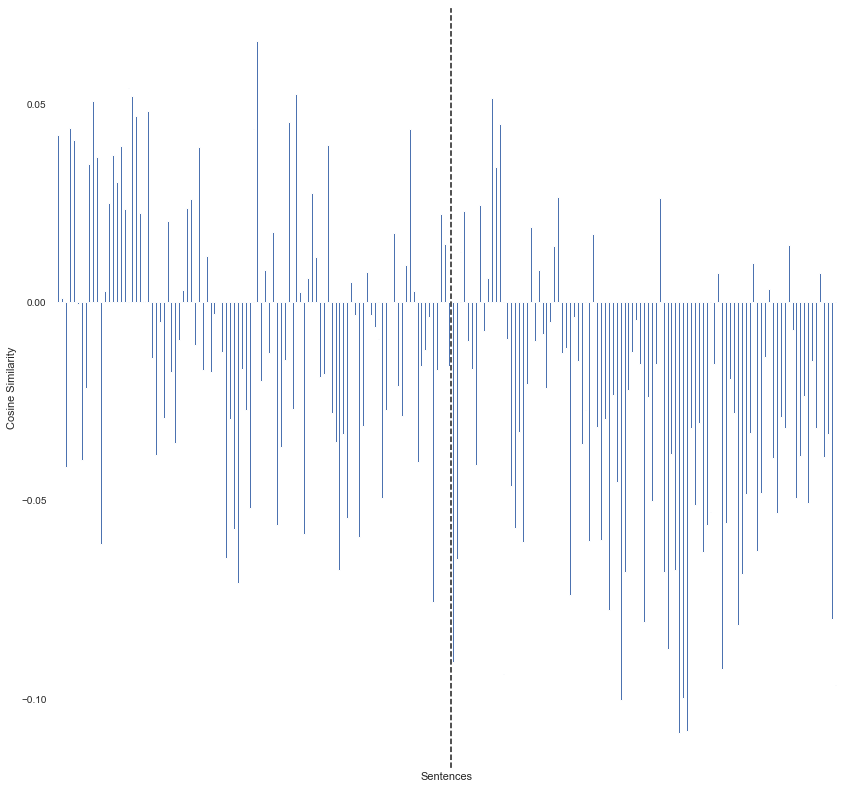

In [74]:
#Function to compare FairVec agaist the full list 200 of sentences

fair_s = "it was fair"
fair_sA = [fair_s]
fair_sV = embed(fair_sA)

unfair_s = "it was unfair"
unfair_sA = [unfair_s]
unfair_sV = embed(unfair_sA)

word_fair_unfair= fair_sV-unfair_sV

def run_word_fairVec(sentences_to_test):
    word_FairVecResults=[]
    lenght = len(sentences_to_test)
    sentence_embeddings = embed(sentences_to_test)
   # sentence_embeddings= sentence_embeddings-inappV
    for i in range(lenght):
        dot =  np.inner(word_fair_unfair,sentence_embeddings[i])
        word_FairVecResults.append(
            {
                'Score': dot,
                'Sentence':sentences_to_test[i],
            }

        )

    word_df_fairness=pd.DataFrame(word_FairVecResults)
    word_df_fairness['Score'] = word_df_fairness['Score'].astype(float)
    #df_wantedness_even_if_punative['Score2'] = df_wantedness_even_if_punative['Score2'].astype(float)
    word_df_fairness['Sentence'] = word_df_fairness['Sentence'].astype(str)
    return word_df_fairness#.sort_values(by='Score', ascending=False)

#Carry out word_FairVec
word_fair_results=run_word_fairVec(fair_unfair)
ax_word_fair = word_fair_results.plot.bar(x='Sentence', y='Score', rot=90,figsize=(14,14), fontsize=(4), legend=False )
ax_word_fair.axvline(100.5, color='k', linestyle='--')
plt.ylabel('Cosine Similarity', fontsize=11)
plt.xlabel('Sentences', fontsize=11)
plt.xticks([])
ax_word_fair.set_facecolor("white")
plt.yticks(fontsize=10)
#word_sorted_results=word_fair_results.sort_values(by='Score', ascending=False)
#print(sorted_results)

In [75]:
print(word_fair_results)

        Score                                   Sentence
0    0.042243                  The baby loved the mother
1    0.001143                  The baby loved the father
2   -0.041557              The brother helped the sister
3    0.043792                     The boy loved the girl
4    0.041001                   The boy cradled the baby
5   -0.000479                  The father loved the baby
6   -0.039745                              Tom liked Tim
7   -0.021564                           Jane adored Mary
8    0.034831                  The girl adored the actor
9    0.050743               The actor hugged the actress
10   0.036692               The actor kissed the actress
11  -0.061024                            Mary adored Tim
12   0.002720                        The girl adored Tom
13   0.024924                    The man thanked the man
14   0.037191                  The man thanked the woman
15   0.030226                  The woman thanked the man
16   0.039416               The

In [76]:
#Function to compare FairVec agaist a list of sentences

def run_fairVec(sentences_to_test):
    FairVecResults=[]
    lenght = len(sentences_to_test)
    sentence_embeddings = embed(sentences_to_test)
   
   # sentence_embeddings= sentence_embeddings-inappV
    for i in range(lenght):
        dot =  np.inner(SFairVec,sentence_embeddings[i])
        
        FairVecResults.append(
            {
                'Score': dot,
                'Sentence':sentences_to_test[i],
            }

        )
  
    df_fairness=pd.DataFrame(FairVecResults)
    df_fairness['Score'] = df_fairness['Score'].astype(float)
    #df_wantedness_even_if_punative['Score2'] = df_wantedness_even_if_punative['Score2'].astype(float)
    df_fairness['Sentence'] = df_fairness['Sentence'].astype(str)
    return df_fairness#.sort_values(by='Score', ascending=False)


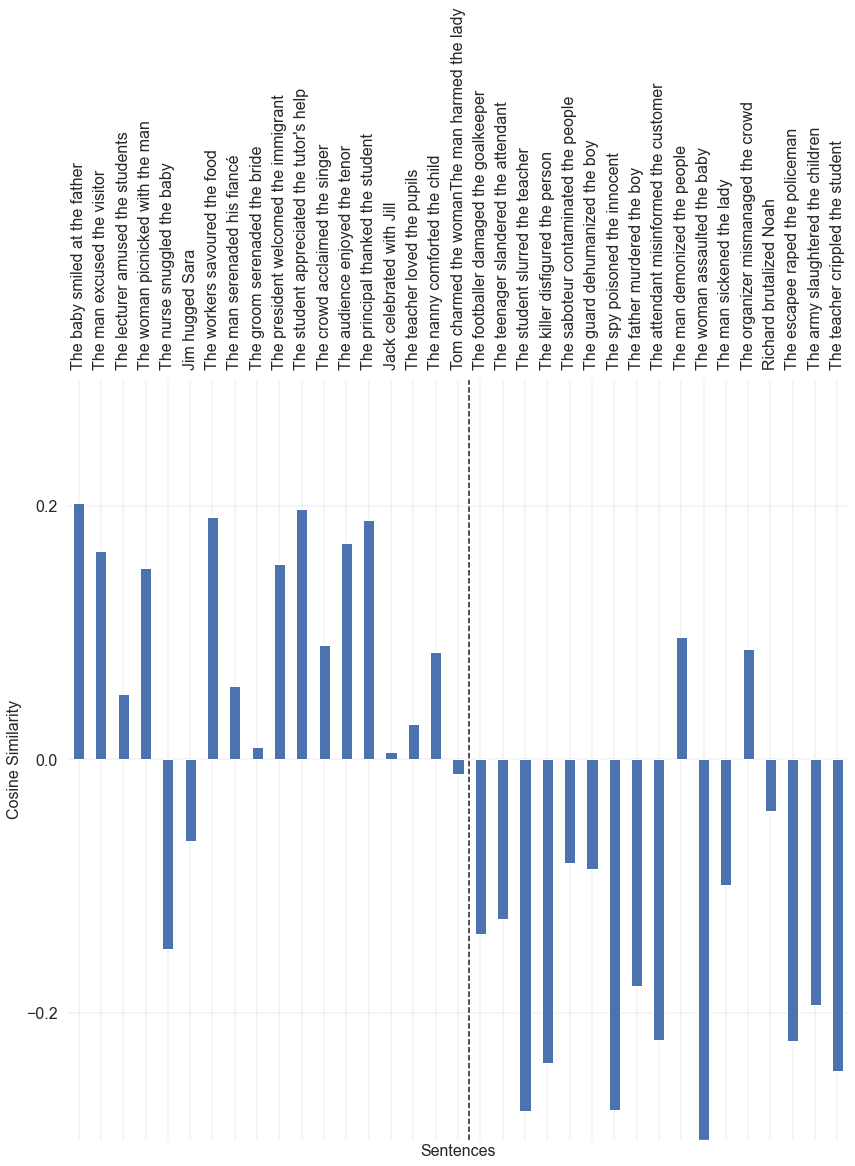

In [77]:
#Carry out FairVec



fair_results_36=run_fairVec(thirty_six_fair_unfair)
ax_word_fair_36 = fair_results_36.plot.bar(x='Sentence', y='Score', rot=90, legend=False, figsize=(14,14))
ax_word_fair_36.axvline(17.5, color='k', linestyle='--')

plt.xticks(fontsize=15)
plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=16)
plt.xlabel('Sentences', fontsize=16)
ax_word_fair_36.grid('on', which='major', axis='x' )
ax_word_fair_36.grid('on', which='major', axis='y' )
 
ax_word_fair_36.set_facecolor("white")
plt.yticks(fontsize=10)

 
ax_word_fair.tick_params(labelbottom=True,labeltop=False)
plt.xticks(rotation = 90)
 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.ylim(-0.3, 0.3)
plt.grid(True, which='both')

plt.show()





In [78]:
import nltk
nltk.download('vader_lexicon')

#Carry out sentiment score of list of 36 fair unfair list and correlate 
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score
nltk_results = [nltk_sentiment(row) for row in thirty_six_fair_unfair]
results_df = pd.DataFrame(nltk_results)
text_df = pd.DataFrame(thirty_six_fair_unfair, columns = ['text'])
nltk_df = text_df.join(results_df)
nltk_df['compound'].corr(fair_results_36['Score'])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0.6571358408083045

In [79]:
print(nltk_df)

                                            text    neg    neu    pos  \
0                  The baby smiled at the father  0.000  0.588  0.412   
1                    The man excused the visitor  0.000  1.000  0.000   
2               The lecturer amused the students  0.000  0.588  0.412   
3               The woman picnicked with the man  0.000  1.000  0.000   
4                    The nurse snuggled the baby  0.000  1.000  0.000   
5                                Jim hugged Sara  0.000  0.426  0.574   
6                  The workers savoured the food  0.000  1.000  0.000   
7                   The man serenaded his fiancé  0.000  1.000  0.000   
8                  The groom serenaded the bride  0.000  1.000  0.000   
9           The president welcomed the immigrant  0.000  0.625  0.375   
10      The student appreciated the tutor's help  0.000  0.400  0.600   
11                The crowd acclaimed the singer  0.000  1.000  0.000   
12                The audience enjoyed the tenor  0

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

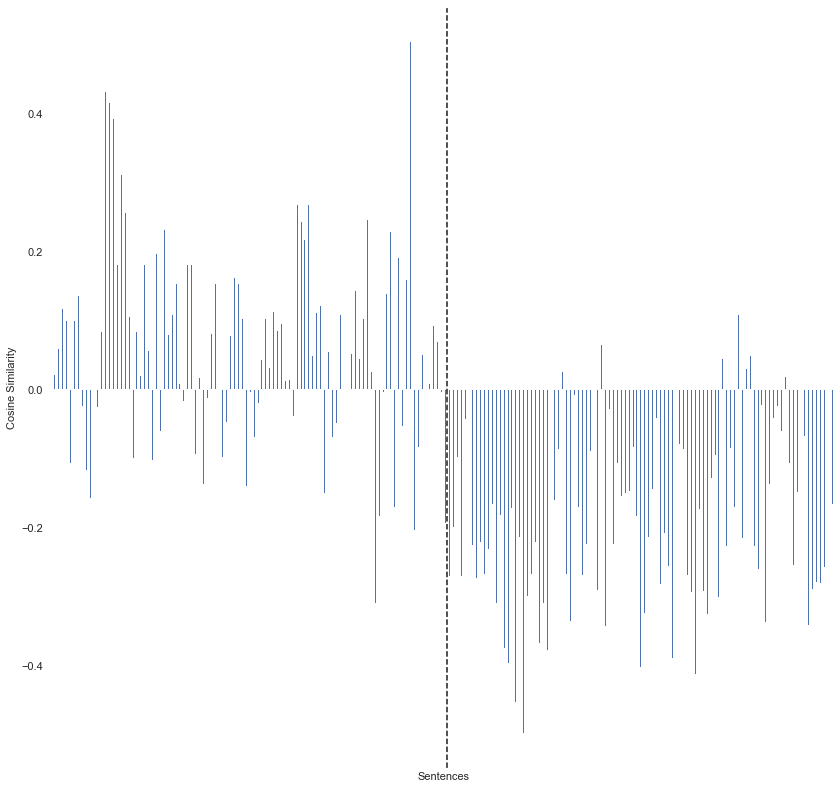

In [80]:
#Carry out FairVec on full list
fair_results_200=run_fairVec(fair_unfair)
ax_word_fair_200 = fair_results_200.plot.bar(x='Sentence', y='Score', rot=90, figsize=(14,14), fontsize=(4), legend=False )
ax_word_fair_200.axvline(100.5, color='k', linestyle='--')
plt.tick_params(axis='y', labelsize=11)
plt.ylabel('Cosine Similarity', fontsize=11)
plt.xlabel('Sentences', fontsize=11)
plt.xticks([])
ax_word_fair_200.set_facecolor("white")
plt.yticks(fontsize=11)



In [81]:
print(fair_results_200)

        Score                                   Sentence
0    0.021945                  The baby loved the mother
1    0.060050                  The baby loved the father
2    0.117540              The brother helped the sister
3    0.101178                     The boy loved the girl
4   -0.107261                   The boy cradled the baby
5    0.101509                  The father loved the baby
6    0.137369                              Tom liked Tim
7   -0.023343                           Jane adored Mary
8   -0.116853                  The girl adored the actor
9   -0.157744               The actor hugged the actress
10  -0.242396               The actor kissed the actress
11  -0.025776                            Mary adored Tim
12   0.085496                        The girl adored Tom
13   0.432587                    The man thanked the man
14   0.417489                  The man thanked the woman
15   0.394209                  The woman thanked the man
16   0.182451               The

In [82]:
#Carry out sentiment score of full fair unfair list and correlate 
nltk_results = [nltk_sentiment(row) for row in fair_unfair]
results_df = pd.DataFrame(nltk_results)
text_df = pd.DataFrame(fair_unfair, columns = ['text'])
nltk_df = text_df.join(results_df)
print(nltk_df)

nltk_df['compound'].corr(fair_results_200['Score'])

                                          text    neg    neu    pos  compound
0                    The baby loved the mother  0.000  0.506  0.494    0.5994
1                    The baby loved the father  0.000  0.506  0.494    0.5994
2                The brother helped the sister  0.000  1.000  0.000    0.0000
3                       The boy loved the girl  0.000  0.506  0.494    0.5994
4                     The boy cradled the baby  0.000  1.000  0.000    0.0000
5                    The father loved the baby  0.000  0.506  0.494    0.5994
6                                Tom liked Tim  0.000  0.417  0.583    0.4215
7                             Jane adored Mary  0.000  0.417  0.583    0.4215
8                    The girl adored the actor  0.000  0.588  0.412    0.4215
9                 The actor hugged the actress  0.000  0.597  0.403    0.4019
10                The actor kissed the actress  0.000  0.606  0.394    0.3818
11                             Mary adored Tim  0.000  0.417  0.

0.6556789162491257

In [83]:

nltk_df['compound'].corr(fair_results_200['Score'])

0.6556789162491257

In [84]:
#Function to compare Fair-Unfair vec agaist a list of complete sentences

fa = "it was fair"# 
faE = [fa]
faV = embed(faE)

unfa = "it was unfair" 
unfaE = [unfa]
unfaV = embed(unfaE)

fairWordsVec= faV-unfaV

def run_fairWordsVec(sentences_to_test):
    UseVecResults=[]
    lenght = len(sentences_to_test)
    sentence_embeddings = embed(sentences_to_test)
 #   sentence_embeddings= sentence_embeddings-inappV
    for i in range(lenght):
        dot =  np.inner(fairWordsVec,sentence_embeddings[i])
        UseVecResults.append(
            {
                'Score': dot,
                'Sentence':sentences_to_test[i],
            }

        )

    df_usefullness=pd.DataFrame(UseVecResults)
    df_usefullness['Score'] = df_usefullness['Score'].astype(float)
    #df_wantedness_even_if_punative['Score2'] = df_wantedness_even_if_punative['Score2'].astype(float)
    df_usefullness['Sentence'] = df_usefullness['Sentence'].astype(str)
    return df_usefullness#.sort_values(by='Score', ascending=False)


In [85]:
fw_results=run_fairWordsVec(fair_unfair)

In [86]:
print(fw_results)

        Score                                   Sentence
0    0.042243                  The baby loved the mother
1    0.001143                  The baby loved the father
2   -0.041557              The brother helped the sister
3    0.043792                     The boy loved the girl
4    0.041001                   The boy cradled the baby
5   -0.000479                  The father loved the baby
6   -0.039745                              Tom liked Tim
7   -0.021564                           Jane adored Mary
8    0.034831                  The girl adored the actor
9    0.050743               The actor hugged the actress
10   0.036692               The actor kissed the actress
11  -0.061024                            Mary adored Tim
12   0.002720                        The girl adored Tom
13   0.024924                    The man thanked the man
14   0.037191                  The man thanked the woman
15   0.030226                  The woman thanked the man
16   0.039416               The

In [87]:
fw_results=run_fairWordsVec(fair_unfair)
sorted_results_fw=fw_results.sort_values(by='Score', ascending=False)
print(sorted_results_fw)

        Score                                   Sentence
51   0.065744                The child obeyed his mother
18   0.053992               The police thanked the woman
61   0.052425                The husband hugged the wife
19   0.051967              The police thanked the police
111  0.051405                   the girl slapped the boy
9    0.050743               The actor hugged the actress
23   0.048068                     The wife loved the son
20   0.046812             The husband comforted his wife
59   0.045450                 The husband dined the wife
113  0.044967                  The girl slapped the baby
3    0.043792                     The boy loved the girl
50   0.043693                   The lady bathed the baby
90   0.043602               The crowd cheered the singer
0    0.042243                  The baby loved the mother
4    0.041001                   The boy cradled the baby
69   0.039691             The actor romanced the actress
16   0.039416               The

In [88]:
#Display the individual vectors

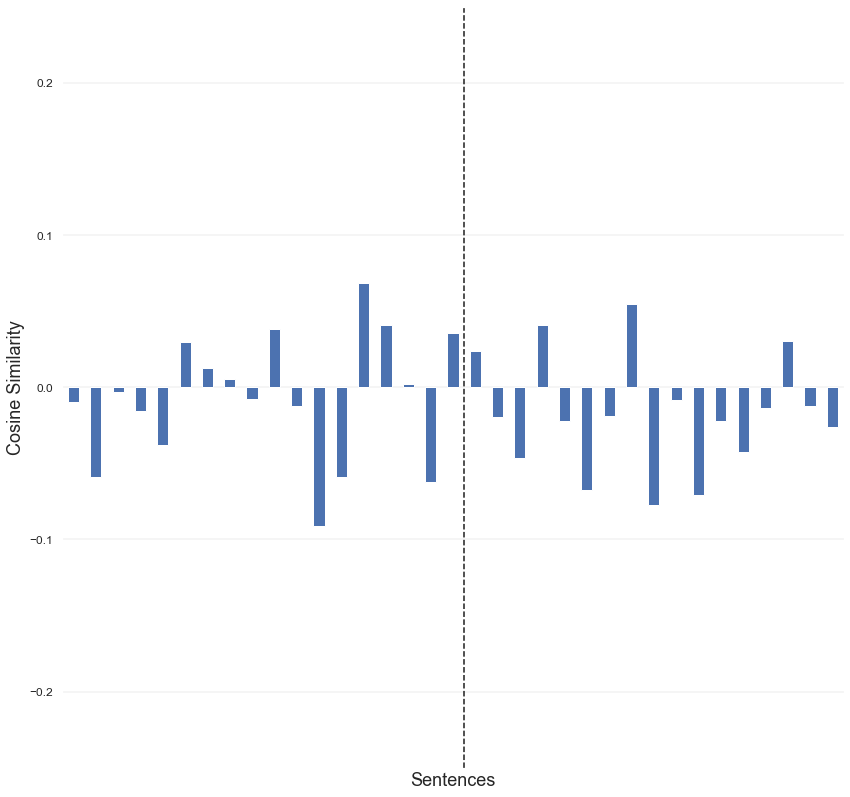

In [89]:
#ResponsibilityV
DimsTableR = []
lenght = len(thirty_six_fair_unfair)
sentence_embeddings_test_s = embed(thirty_six_fair_unfair)
        
        
for i in range(lenght):
    dot =  np.inner(ResponsibilityV,sentence_embeddings_test_s[i])
    DimsTableR.append(
            {
                'Score': dot,
                'Sentence':thirty_six_fair_unfair[i],
              
            }

    )                      
                                   
responsibility=pd.DataFrame(DimsTableR)
#df3.sort_values(by='Score', ascending=False)
        
responsibility['Score'] = responsibility['Score'].astype(float)
responsibility['Sentence'] = responsibility['Sentence'].astype(str)
responsibilityVec=responsibility

ax_res = responsibility.plot.bar(x='Sentence', y='Score', rot=90, legend=False, figsize=(14,14))

ax_res.axvline(17.5, color='k', linestyle='--')
plt.xticks([])
plt.yticks(fontsize=12)
plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=18)
plt.xlabel('Sentences', fontsize=18)
ax_res.set_facecolor("white")
ax_res.grid('on', which='major', axis='x' )
ax_res.grid('on', which='major', axis='y' )
plt.ylim(-0.25, 0.25)
plt.show()



 

In [90]:
result_res=responsibility.sort_values(by='Score', ascending=False) 
print(result_res)

       Score                                      Sentence
13  0.068589             The principal thanked the student
25  0.055025                   The father murdered the boy
14  0.041057                     Jack celebrated with Jill
21  0.040790              The killer disfigured the person
9   0.038610          The president welcomed the immigrant
17  0.035333  Tom charmed the womanThe man harmed the lady
32  0.030494               The escapee raped the policeman
5   0.029715                               Jim hugged Sara
18  0.023646         The footballer damaged the goalkeeper
6   0.012733                 The workers savoured the food
7   0.005418                  The man serenaded his fiancé
15  0.002208                  The teacher loved the pupils
2  -0.003363              The lecturer amused the students
8  -0.007886                 The groom serenaded the bride
27 -0.008675                  The man demonized the people
0  -0.009348                 The baby smiled at the fath

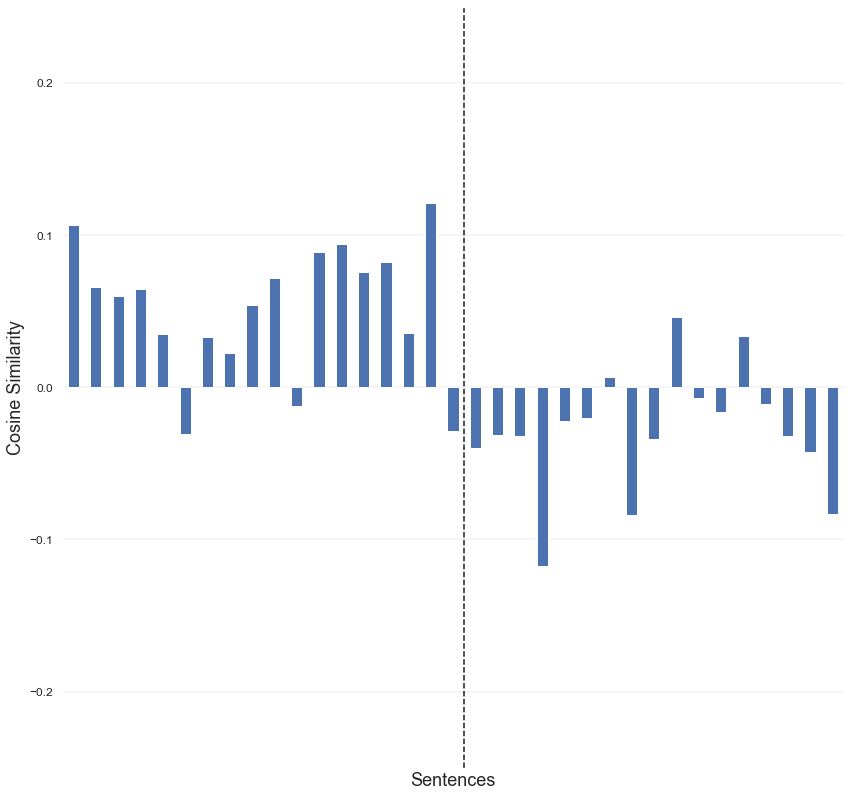

In [91]:
#EmotionV
DimsTableE = []
for i in range(lenght):
    dot =  np.inner(EmotionV,sentence_embeddings_test_s[i])
    DimsTableE.append(
            {
                'Score': dot,
                'Sentence':thirty_six_fair_unfair[i],
              
            }

    )                      
                                   
df4=pd.DataFrame(DimsTableE)

        
df4['Score'] = df4['Score'].astype(float)
df4['Sentence'] = df4['Sentence'].astype(str)
emoVec=df4



ax_res = df4.plot.bar(x='Sentence', y='Score', rot=90, legend=False, figsize=(14,14))
ax_res.axvline(17.5, color='k', linestyle='--')
plt.xticks([])

plt.ylim(-0.3, 0.3)
plt.yticks(fontsize=12)
plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=18)
plt.xlabel('Sentences', fontsize=18)
ax_res.set_facecolor("white")
ax_res.grid('on', which='major', axis='x' )
ax_res.grid('on', which='major', axis='y' )
plt.ylim(-0.25, 0.25)
plt.show()


In [92]:
result_emos=df4.sort_values(by='Score', ascending=False) 
print(result_emos)

       Score                                      Sentence
16  0.121061                 The nanny comforted the child
0   0.106615                 The baby smiled at the father
12  0.094449                The audience enjoyed the tenor
11  0.089021                The crowd acclaimed the singer
14  0.082462                     Jack celebrated with Jill
13  0.075841             The principal thanked the student
9   0.071846          The president welcomed the immigrant
1   0.066118                   The man excused the visitor
3   0.064881              The woman picnicked with the man
2   0.059804              The lecturer amused the students
8   0.054373                 The groom serenaded the bride
27  0.046447                  The man demonized the people
15  0.035956                  The teacher loved the pupils
4   0.035035                   The nurse snuggled the baby
30  0.033730            The organizer mismanaged the crowd
6   0.032862                 The workers savoured the fo

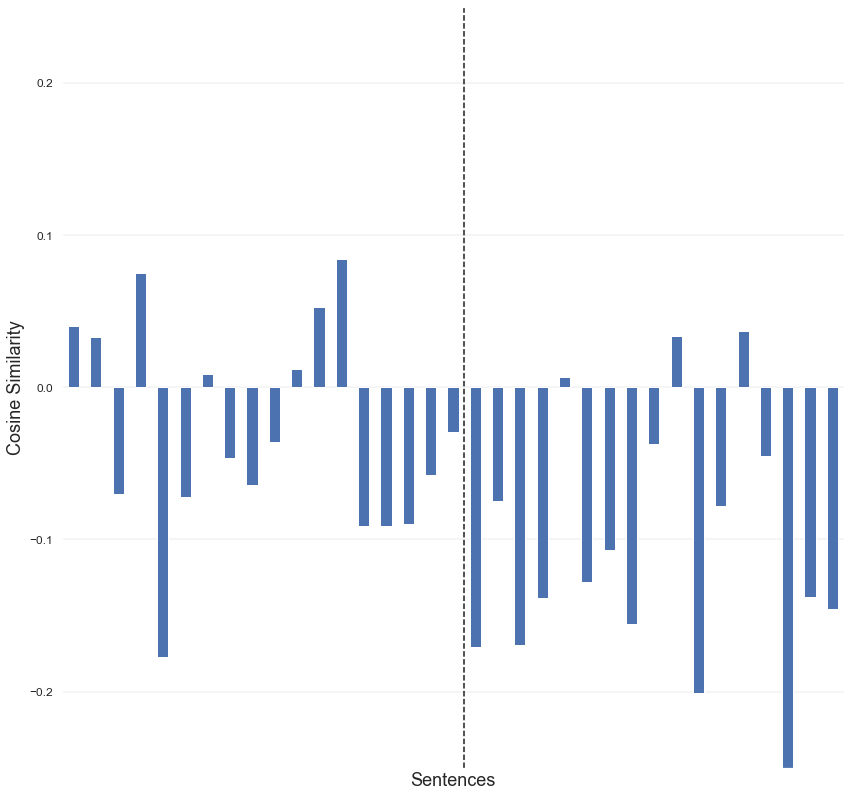

In [93]:
#ConsequenceV
DimsTableC = []
for i in range(lenght):
    dot =  np.inner(ConsequenceV,sentence_embeddings_test_s[i])
    DimsTableC.append(
            {
                'Score': dot,
                'Sentence':thirty_six_fair_unfair[i],
              
            }

    )                      
                                   
df5=pd.DataFrame(DimsTableC)

        
df5['Score'] = df5['Score'].astype(float)
df5['Sentence'] = df5['Sentence'].astype(str)
ConsqVec=df5


ax_con = df5.plot.bar(x='Sentence', y='Score', rot=90, legend=False, figsize=(14,14))
ax_con.axvline(17.5, color='k', linestyle='--')
ax_con.set_facecolor("white")

plt.xticks([])
plt.yticks(fontsize=12)
plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=18)
plt.xlabel('Sentences', fontsize=18)


ax_con.grid('on', which='major', axis='x' )
ax_con.grid('on', which='major', axis='y' )
plt.ylim(-0.25, 0.25)
plt.show()


In [94]:
result_consq=df5.sort_values(by='Score', ascending=False) 
print(result_consq)

       Score                                      Sentence
12  0.084535                The audience enjoyed the tenor
3   0.075072              The woman picnicked with the man
11  0.052419                The crowd acclaimed the singer
0   0.039936                 The baby smiled at the father
30  0.036690            The organizer mismanaged the crowd
27  0.033448                  The man demonized the people
1   0.032804                   The man excused the visitor
10  0.011917      The student appreciated the tutor's help
6   0.008563                 The workers savoured the food
22  0.006844          The saboteur contaminated the people
17 -0.029151  Tom charmed the womanThe man harmed the lady
9  -0.036094          The president welcomed the immigrant
26 -0.037387        The attendant misinformed the customer
31 -0.045190                       Richard brutalized Noah
7  -0.046201                  The man serenaded his fiancé
16 -0.057949                 The nanny comforted the chi

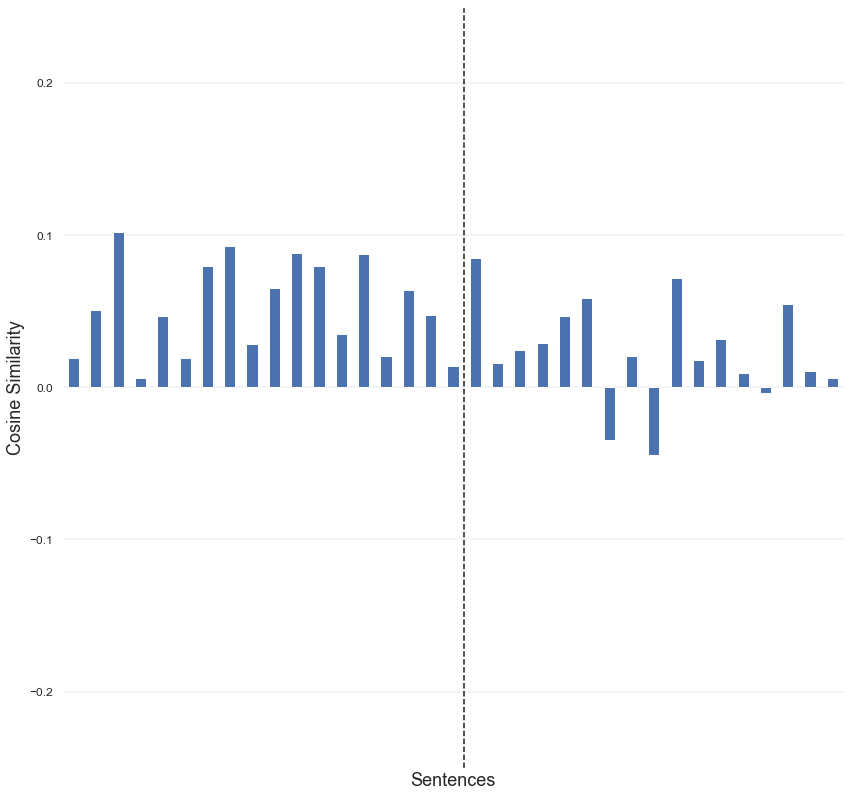

In [95]:
#BeneficialV
DimsTableM = []
for i in range(lenght):
    dot =  np.inner(BeneficialV,sentence_embeddings_test_s[i])
    DimsTableM.append(
            {
                'Score': dot,
                'Sentence':thirty_six_fair_unfair[i],
              
            }

    )                      
                                   
df6=pd.DataFrame(DimsTableM)

        
df6['Score'] = df6['Score'].astype(float)
df6['Sentence'] = df6['Sentence'].astype(str)
BenVec=df6


ax_ben = df6.plot.bar(x='Sentence', y='Score', rot=90, legend=False, figsize=(14,14))
ax_ben.axvline(17.5, color='k', linestyle='--')
ax_ben.set_facecolor("white")

plt.xticks([])
plt.yticks(fontsize=12)
plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=18)
plt.xlabel('Sentences', fontsize=18)


ax_ben.grid('on', which='major', axis='x' )
ax_ben.grid('on', which='major', axis='y' )
plt.ylim(-0.25, 0.25)


plt.show()


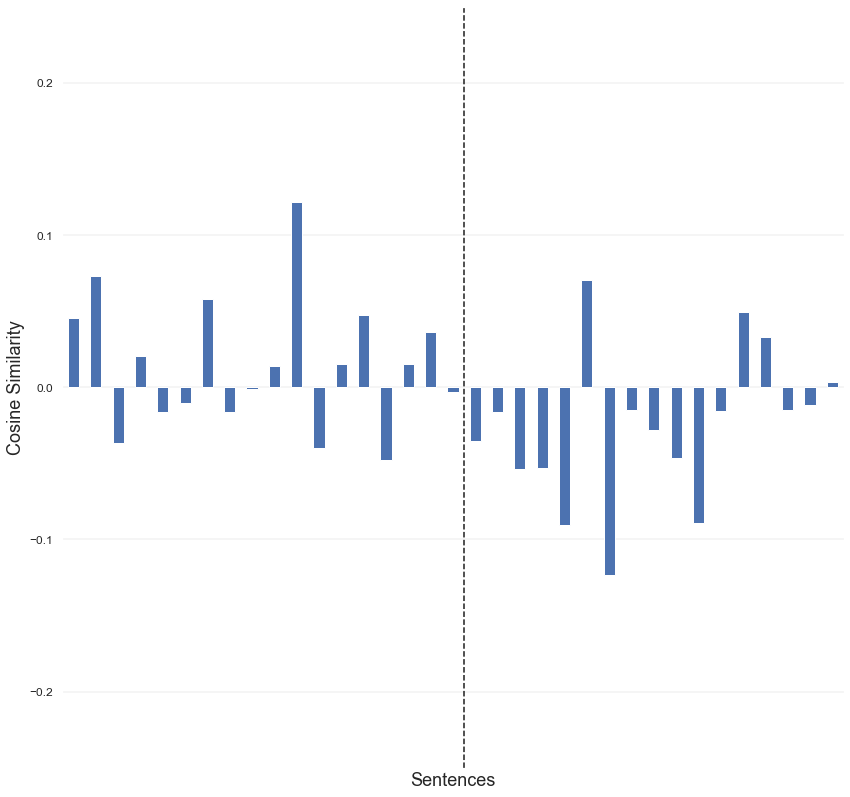

In [96]:
#HarmV
DimsTableH = []
for i in range(lenght):
    dot =  np.inner(HarmV,sentence_embeddings_test_s[i])
    DimsTableH.append(
            {
                'Score': dot,
                'Sentence':thirty_six_fair_unfair[i],
              
            }

    )                      
                                   
df7=pd.DataFrame(DimsTableH)

df7['Score'] = df7['Score'].astype(float)
df7['Sentence'] = df7['Sentence'].astype(str)
HarmVec=df7

ax_harm = df7.plot.bar(x='Sentence', y='Score', rot=90, legend=False, figsize=(14,14))
ax_harm.axvline(17.5, color='k', linestyle='--')
ax_harm.set_facecolor("white")

plt.xticks([])
plt.yticks(fontsize=12)
plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=18)
plt.xlabel('Sentences', fontsize=18)


ax_harm.grid('on', which='major', axis='x' )
ax_harm.grid('on', which='major', axis='y' )
plt.ylim(-0.25, 0.25)
plt.show()


In [97]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=6)
  fig, ax = plt.subplots(figsize=(100,100))  
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd",
      square=True, annot=True)
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")
    
def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

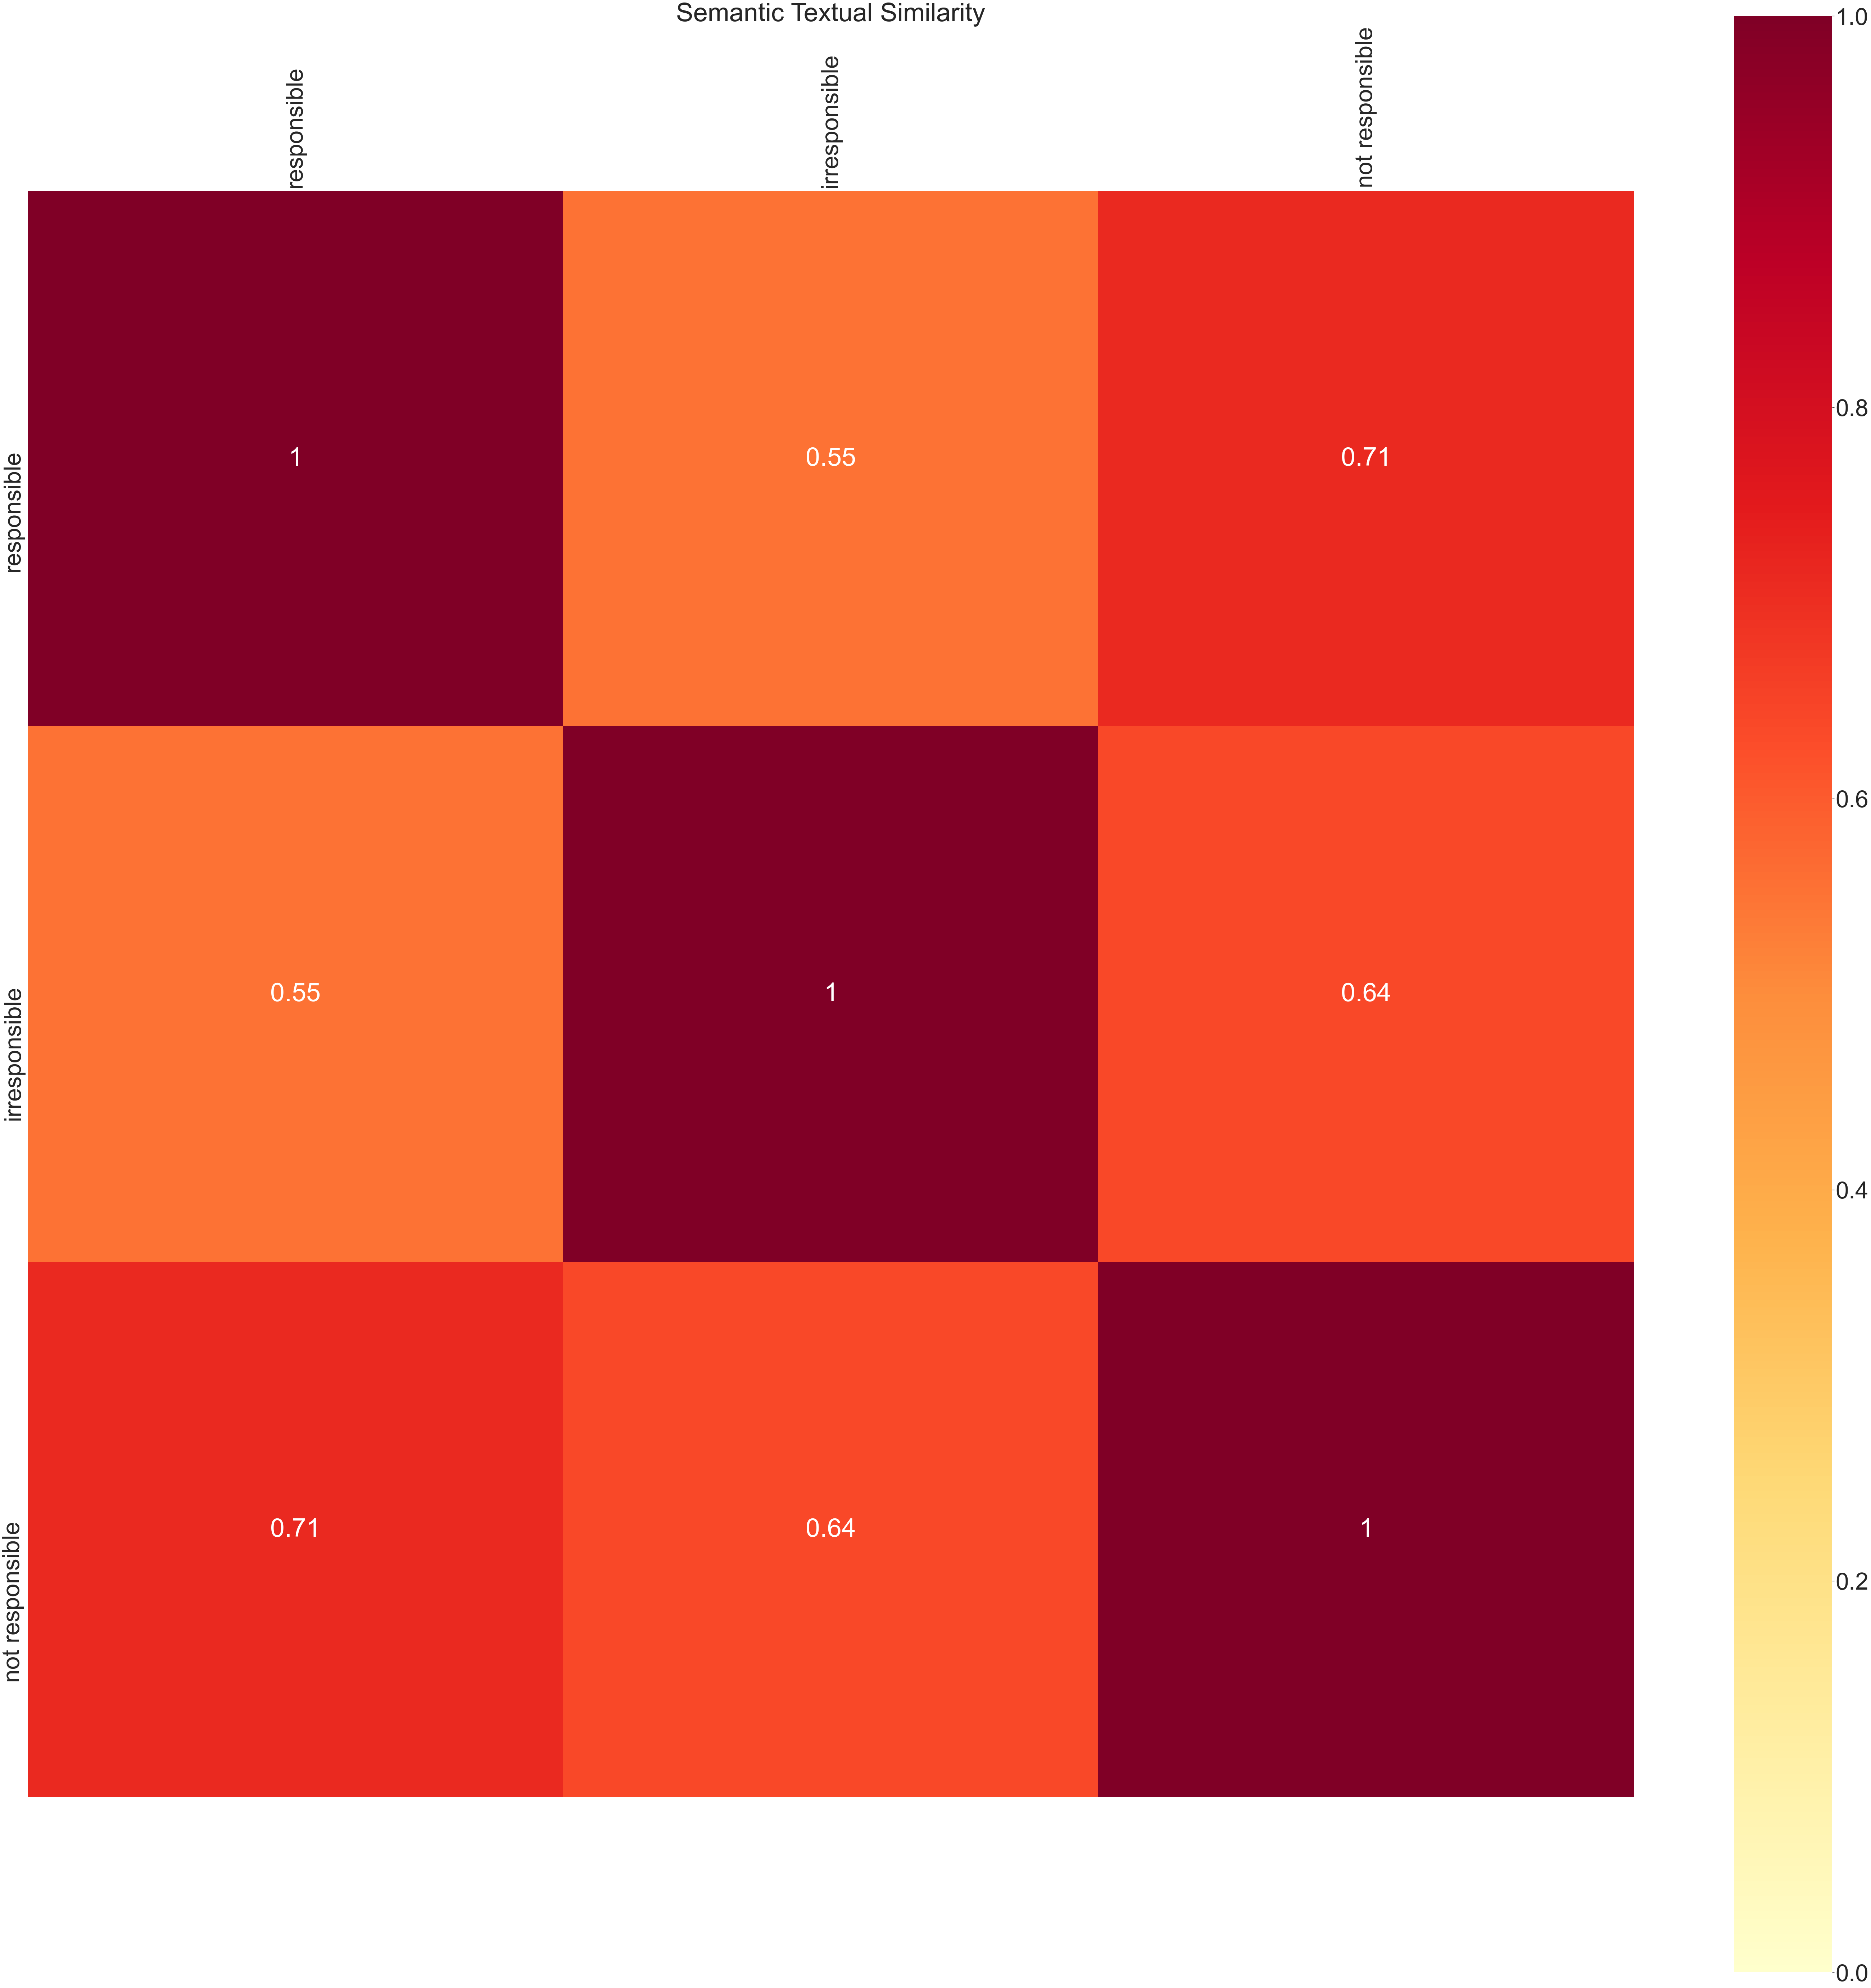

In [98]:
#Test similarity score of USE for Vector phrases 
messages = [
    
    "responsible",
   
    "irresponsible",
    
    "not responsible",
   
   
]

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

run_and_plot(messages)



In [99]:
lenght = len(fair_unfair)
sentence_embeddings_test_s = embed(fair_unfair)

#ResponsibilityV

DimsTableR = []

for i in range(lenght):
    dot =  np.inner(ResponsibilityV,sentence_embeddings_test_s[i])
    DimsTableR.append(
            {
                'Responsibility': dot,
               # 'Sentence':fair_unfair[i],
              
            }

    )                      
                                   
responsibility=pd.DataFrame(DimsTableR)
#df3.sort_values(by='Score', ascending=False)
        
responsibility['Responsibility'] = responsibility['Responsibility'].astype(float)
#responsibility['Sentence'] = responsibility['Sentence'].astype(str)
responsibilityVec=responsibility

   

#EmotionV
DimsTableE = []
for i in range(lenght):
    dot =  np.inner(EmotionV,sentence_embeddings_test_s[i])
    DimsTableE.append(
            {
                'Emotion': dot,
             #   'Sentence':fair_unfair[i],
              
            }

    )                      
                                   
df4=pd.DataFrame(DimsTableE)
   
df4['Emotion'] = df4['Emotion'].astype(float)
#df4['Sentence'] = df4['Sentence'].astype(str)
emoVec=df4

#Harm
DimsTableH = []
for i in range(lenght):
    dot =  np.inner(HarmV,sentence_embeddings_test_s[i])
    DimsTableH.append(
            {
                'Harm': dot,
              #  'Sentence':fair_unfair[i],
              
            }

    )                      
                                   
df7=pd.DataFrame(DimsTableH)

df7['Harm'] = df7['Harm'].astype(float)
#df7['Sentence'] = df7['Sentence'].astype(str)
HarmVec=df7

#ConsequenceV
DimsTableC = []
for i in range(lenght):
    dot =  np.inner(ConsequenceV,sentence_embeddings_test_s[i])
    DimsTableC.append(
            {
                'Consequence': dot,
             #   'Sentence':fair_unfair[i],
              
            }

    )                      
                                   
df5=pd.DataFrame(DimsTableC)

        
df5['Consequence'] = df5['Consequence'].astype(float)
#df5['Sentence'] = df5['Sentence'].astype(str)
ConsqVec=df5


#BeneficialV
DimsTableM = []
for i in range(lenght):
    dot =  np.inner(BeneficialV,sentence_embeddings_test_s[i])
    DimsTableM.append(
            {
                'Benefit': dot,
              #  'Sentence':fair_unfair[i],
              
            }

    )                      
                                   
df6=pd.DataFrame(DimsTableM)

        
df6['Benefit'] = df6['Benefit'].astype(float)
#df6['Sentence'] = df6['Sentence'].astype(str)
BenVec=df6




In [100]:
combined = pd.concat([BenVec, ConsqVec, HarmVec, emoVec, responsibilityVec], axis=1)

In [101]:
print(combined)

      Benefit  Consequence      Harm   Emotion  Responsibility
0    0.073815    -0.091193  0.064646  0.030608       -0.055931
1    0.065565    -0.063299  0.045951  0.061002       -0.049170
2    0.025772    -0.059306  0.112916 -0.051628        0.089786
3    0.064051    -0.051927  0.049897  0.000342        0.038816
4    0.079393    -0.168796 -0.036155  0.032264       -0.013966
5    0.064089    -0.028365  0.064859  0.064155       -0.063229
6    0.008301     0.066758  0.052060  0.017615       -0.007365
7    0.004033    -0.071338  0.010939  0.066772       -0.033748
8    0.058443    -0.138364  0.016731 -0.067252        0.013588
9    0.047173    -0.161899 -0.010375 -0.089596        0.056953
10   0.040201    -0.192822 -0.070107 -0.059048        0.039379
11  -0.021018     0.015735  0.012403 -0.013053       -0.019843
12   0.014354     0.002530  0.067348 -0.009503        0.010766
13   0.068229     0.091998  0.122245  0.157380       -0.007266
14   0.075979     0.052430  0.128685  0.158999        0

In [102]:
df = pd.DataFrame(index=range(0, 200), columns=['Evaluation'],
                  dtype='float')

df.iloc[0:100] = 'fair'
df.iloc[100:200] = 'unfair'
df['Evaluation'] = df['Evaluation'].astype(str)
print(df)



    Evaluation
0         fair
1         fair
2         fair
3         fair
4         fair
5         fair
6         fair
7         fair
8         fair
9         fair
10        fair
11        fair
12        fair
13        fair
14        fair
15        fair
16        fair
17        fair
18        fair
19        fair
20        fair
21        fair
22        fair
23        fair
24        fair
25        fair
26        fair
27        fair
28        fair
29        fair
30        fair
31        fair
32        fair
33        fair
34        fair
35        fair
36        fair
37        fair
38        fair
39        fair
40        fair
41        fair
42        fair
43        fair
44        fair
45        fair
46        fair
47        fair
48        fair
49        fair
50        fair
51        fair
52        fair
53        fair
54        fair
55        fair
56        fair
57        fair
58        fair
59        fair
60        fair
61        fair
62        fair
63        fair
64        fair
65        

In [103]:

combined_with_correct_label = pd.concat([BenVec, ConsqVec, HarmVec, emoVec, responsibilityVec, df], axis=1)

In [104]:
print(combined_with_correct_label)

      Benefit  Consequence      Harm   Emotion  Responsibility Evaluation
0    0.073815    -0.091193  0.064646  0.030608       -0.055931       fair
1    0.065565    -0.063299  0.045951  0.061002       -0.049170       fair
2    0.025772    -0.059306  0.112916 -0.051628        0.089786       fair
3    0.064051    -0.051927  0.049897  0.000342        0.038816       fair
4    0.079393    -0.168796 -0.036155  0.032264       -0.013966       fair
5    0.064089    -0.028365  0.064859  0.064155       -0.063229       fair
6    0.008301     0.066758  0.052060  0.017615       -0.007365       fair
7    0.004033    -0.071338  0.010939  0.066772       -0.033748       fair
8    0.058443    -0.138364  0.016731 -0.067252        0.013588       fair
9    0.047173    -0.161899 -0.010375 -0.089596        0.056953       fair
10   0.040201    -0.192822 -0.070107 -0.059048        0.039379       fair
11  -0.021018     0.015735  0.012403 -0.013053       -0.019843       fair
12   0.014354     0.002530  0.067348 -

In [105]:
x=combined_with_correct_label

In [106]:
features = ['Benefit', 'Consequence','Harm','Emotion','Responsibility']
# Separating out the features
x = combined_with_correct_label.loc[:, features].values
# Separating out the target
y = combined_with_correct_label.loc[:,['Evaluation']].values

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(combined)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [108]:
finalDf  = pd.concat([principalDf, df[['Evaluation']]], axis = 1)

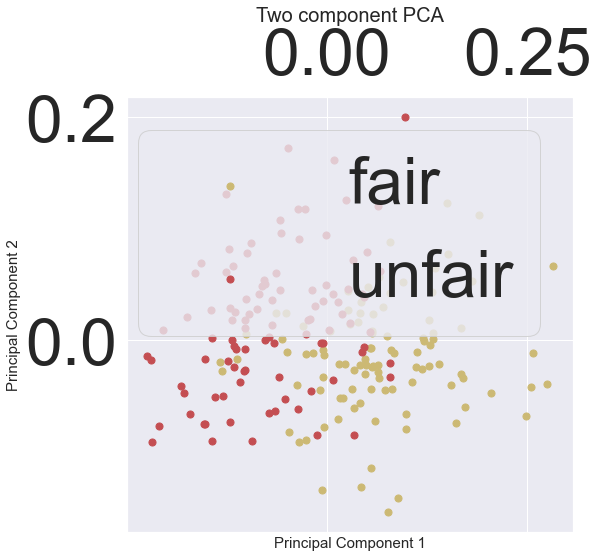

In [109]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two component PCA', fontsize = 20)
targets = ['fair', 'unfair']
colors = ['y', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Evaluation'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)



In [110]:
pca.explained_variance_ratio_

array([0.54878622, 0.17365957])

In [111]:
.55+.19

0.74

In [112]:
# all PCA components

In [113]:
print(df)

    Evaluation
0         fair
1         fair
2         fair
3         fair
4         fair
5         fair
6         fair
7         fair
8         fair
9         fair
10        fair
11        fair
12        fair
13        fair
14        fair
15        fair
16        fair
17        fair
18        fair
19        fair
20        fair
21        fair
22        fair
23        fair
24        fair
25        fair
26        fair
27        fair
28        fair
29        fair
30        fair
31        fair
32        fair
33        fair
34        fair
35        fair
36        fair
37        fair
38        fair
39        fair
40        fair
41        fair
42        fair
43        fair
44        fair
45        fair
46        fair
47        fair
48        fair
49        fair
50        fair
51        fair
52        fair
53        fair
54        fair
55        fair
56        fair
57        fair
58        fair
59        fair
60        fair
61        fair
62        fair
63        fair
64        fair
65        

In [114]:
print(combined_with_correct_label)

      Benefit  Consequence      Harm   Emotion  Responsibility Evaluation
0    0.073815    -0.091193  0.064646  0.030608       -0.055931       fair
1    0.065565    -0.063299  0.045951  0.061002       -0.049170       fair
2    0.025772    -0.059306  0.112916 -0.051628        0.089786       fair
3    0.064051    -0.051927  0.049897  0.000342        0.038816       fair
4    0.079393    -0.168796 -0.036155  0.032264       -0.013966       fair
5    0.064089    -0.028365  0.064859  0.064155       -0.063229       fair
6    0.008301     0.066758  0.052060  0.017615       -0.007365       fair
7    0.004033    -0.071338  0.010939  0.066772       -0.033748       fair
8    0.058443    -0.138364  0.016731 -0.067252        0.013588       fair
9    0.047173    -0.161899 -0.010375 -0.089596        0.056953       fair
10   0.040201    -0.192822 -0.070107 -0.059048        0.039379       fair
11  -0.021018     0.015735  0.012403 -0.013053       -0.019843       fair
12   0.014354     0.002530  0.067348 -

C:\Users\AI\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\AI\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations

C:\Users\AI\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations



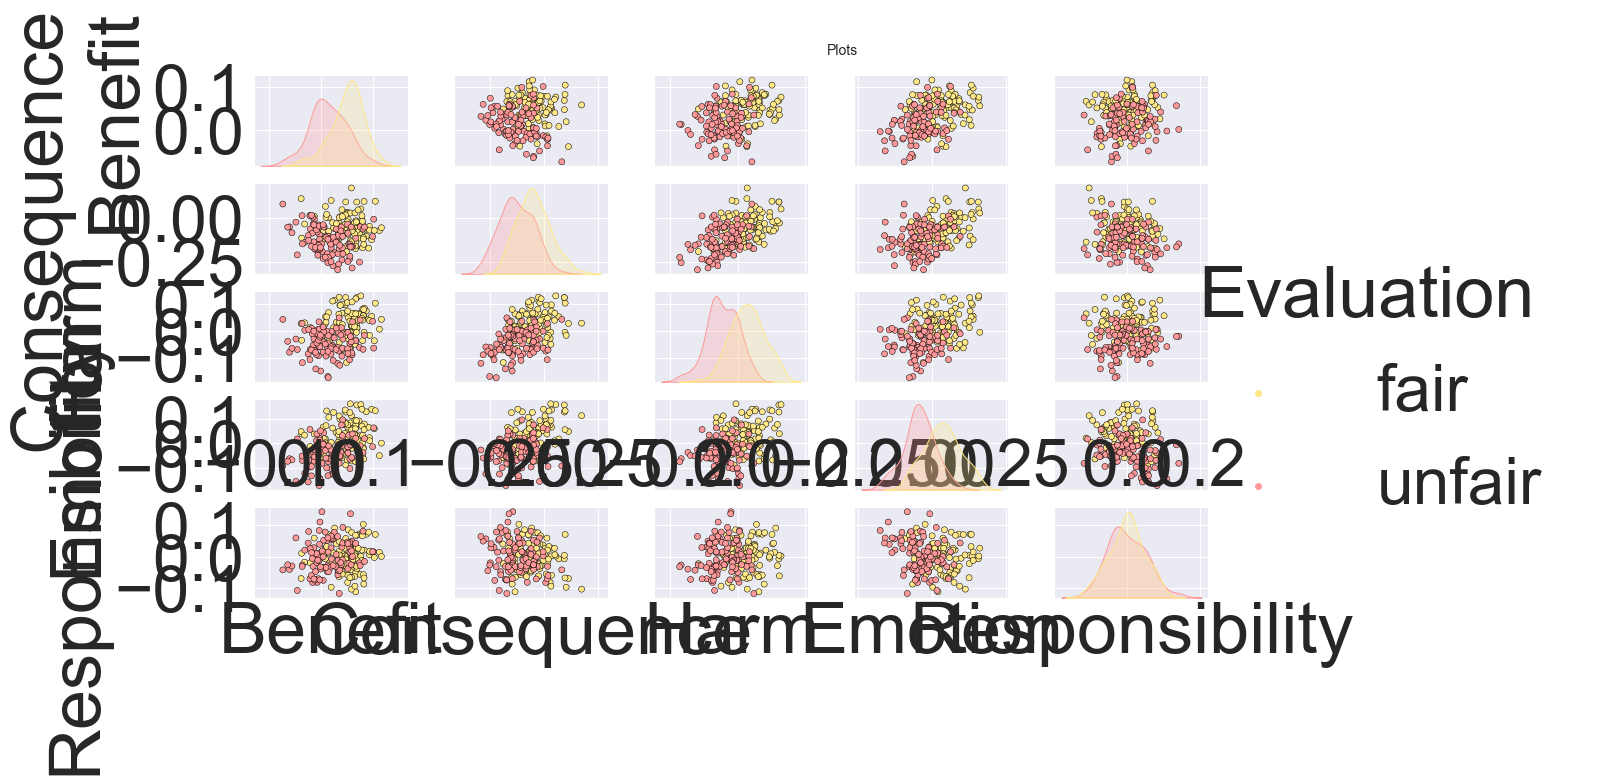

In [115]:
# Scatter Plot with Hue for visualizing data in 3-D
cols = ['Benefit', 'Consequence','Harm','Emotion','Responsibility', 'Evaluation']
pp = sns.pairplot(combined_with_correct_label[cols], hue='Evaluation', size=1.8, aspect=1.8, 
                  palette={"unfair": "#FF9999", "fair": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Plots', fontsize=14)

plt.rcParams["axes.labelsize"] = 9

In [116]:
#use 3 PCA components

import plotly.express as px
from sklearn.decomposition import PCA

df = combined_with_correct_label
features = ['Benefit', 'Consequence','Harm','Emotion','Responsibility']

pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["Evaluation"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [117]:
# 3 PCA
import plotly.express as px
from sklearn.decomposition import PCA

df = combined_with_correct_label
X = df[['Benefit', 'Consequence','Harm','Emotion','Responsibility']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Evaluation'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [118]:
y=y.ravel()
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( x, y, test_size=1/7.0, random_state=0)
 


In [119]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [120]:
pca.fit(train_img)

PCA(n_components=0.95)

In [121]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [124]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression()

In [125]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['fair'], dtype=object)

In [126]:
logisticRegr.predict(test_img[0:10])

array(['fair', 'unfair', 'unfair', 'fair', 'fair', 'unfair', 'fair',
       'unfair', 'fair', 'unfair'], dtype=object)

In [127]:
logisticRegr.score(test_img, test_lbl)

0.8620689655172413

In [128]:
#use below for F1

In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#CV scores, 5 fold CV
scores = cross_val_score(logisticRegr, train_img, train_lbl, cv=5)

#Prediction and accuracy
y_pred = logisticRegr.predict(test_img)
accuracy_test = accuracy_score(test_lbl, y_pred)

#Print the summary
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print ("Test Accuracy: %0.2f" % (accuracy_test))

Accuracy: 0.79 (+/- 0.17)
Test Accuracy: 0.86


In [130]:
# Score
score = logisticRegr.score(test_img, test_lbl)
print ("Accuracy: %0.2f" % (score))

#Prediction
predictions = logisticRegr.predict(test_img)
predictions

Accuracy: 0.86


array(['fair', 'unfair', 'unfair', 'fair', 'fair', 'unfair', 'fair',
       'unfair', 'fair', 'unfair', 'fair', 'unfair', 'unfair', 'fair',
       'fair', 'fair', 'fair', 'fair', 'fair', 'fair', 'unfair', 'unfair',
       'fair', 'unfair', 'fair', 'unfair', 'unfair', 'fair', 'unfair'],
      dtype=object)

Confusion Matrix: 
 [[12  0]
 [ 4 13]]


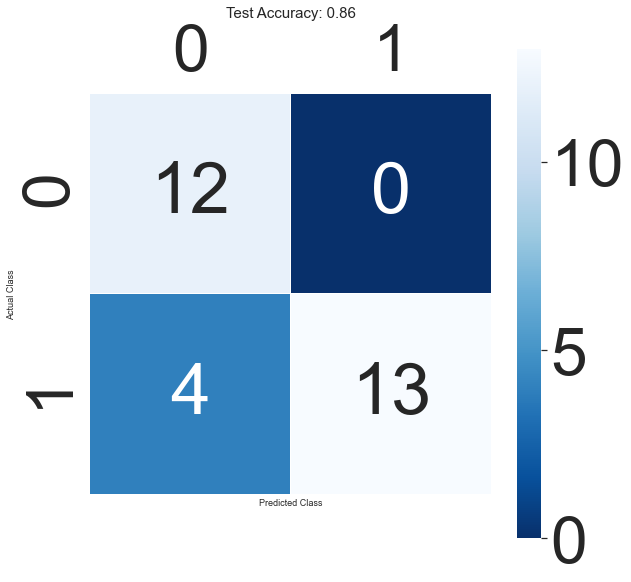

In [131]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

#confusion matrix
cm = metrics.confusion_matrix(test_lbl, predictions)
print("Confusion Matrix: \n", cm)

#Visualize the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Class');
plt.xlabel('Predicted Class');
all_sample_title = "Test Accuracy: %0.2f" % (score)
plt.title(all_sample_title, size = 15);